<a href="https://colab.research.google.com/github/Kiruba-Sherlin/Weather-Data-Analysis-and-Prediction/blob/main/Weather_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


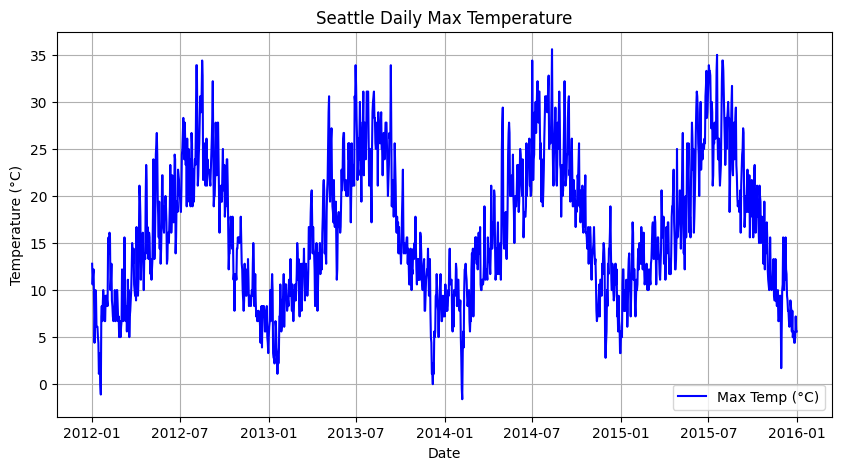

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


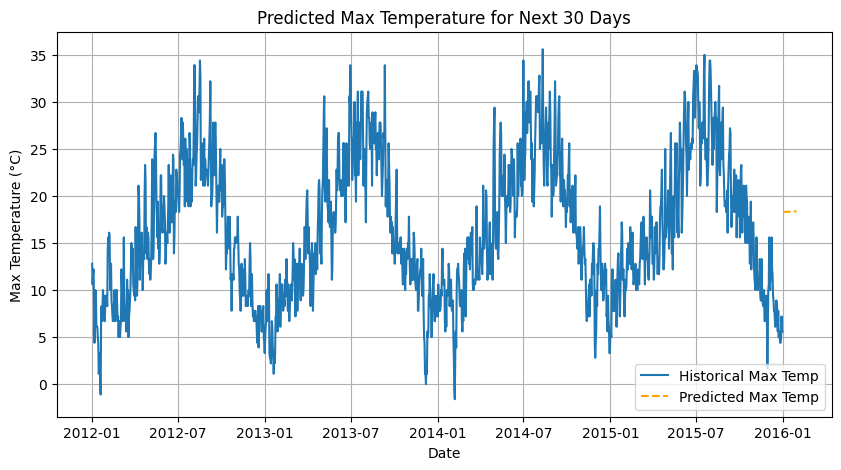

        Date  Predicted_Max_Temperature
0 2016-01-01                  18.296123
1 2016-01-02                  18.298663
2 2016-01-03                  18.301204
3 2016-01-04                  18.303744
4 2016-01-05                  18.306284


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Load and clean the dataset
data = pd.read_csv("seattle-weather.csv")
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")
data = data[['date', 'temp_max']].dropna()
data = data.sort_values('date')

# Step 2: Convert date to number of days since start
data['days'] = (data['date'] - data['date'].min()).dt.days

# Step 3: Plot historical temperature
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['temp_max'], label='Max Temp (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Seattle Daily Max Temperature')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Prepare data for model
X = data[['days']]
y = data['temp_max']

model = LinearRegression()
model.fit(X, y)

# Step 5: Predict for next 30 days
future_days = 30
last_day = data['days'].max()
future_X = np.array([last_day + i for i in range(1, future_days + 1)]).reshape(-1, 1)
future_preds = model.predict(future_X)

# Step 6: Create future date range
last_date = data['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Step 7: Plot future predictions
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['temp_max'], label='Historical Max Temp')
plt.plot(future_dates, future_preds, label='Predicted Max Temp', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.title('Predicted Max Temperature for Next 30 Days')
plt.grid(True)
plt.legend()
plt.show()

# Step 8: Display predicted temperatures
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Max_Temperature': future_preds
})
print(future_df.head())